In [ ]:
Roll no:108806
Name: Rohith R
course name:DA
batch:geetika mam batch (9:30 to 11:30)

In [1]:
# import all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To extract sheet number
excel_file='heart_disease.xlsx'
# read the sheet name
sheet_names=pd.ExcelFile('heart_disease.xlsx').sheet_names
sheet_names

['Description', 'Heart_disease']

In [3]:
# To read excel file
df=pd.read_excel(excel_file,sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## <font color='orange'>Exploratory Data Analysis</font>

In [5]:
# To find the shape of dataset
df.shape

(908, 13)

In [6]:
# To find the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# To find the duplicated values in dataset
df.duplicated().sum()

1

In [8]:
# To drop the duplicated values in dataset
data=df.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [9]:
# To check null values in the dataset
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
# To find the value for oldpeak null places
data['oldpeak'].median()

0.5

In [11]:
# To fill null values with median values in oldpeak
data['oldpeak']=data['oldpeak'].fillna(value=data['oldpeak'].median())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


In [13]:
# To describe the dataset 
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


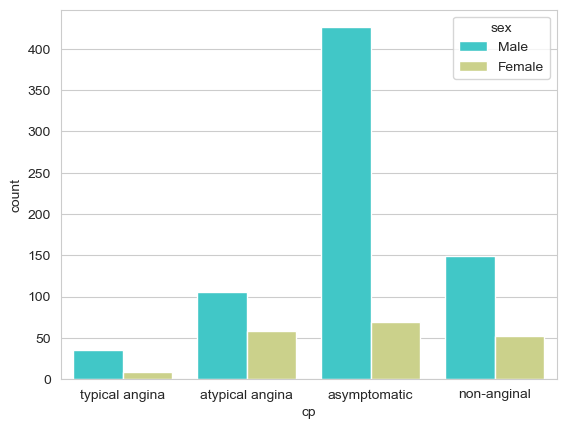

In [14]:
#visualize the data using countplot
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='sex',palette='rainbow',data=data)
plt.show()

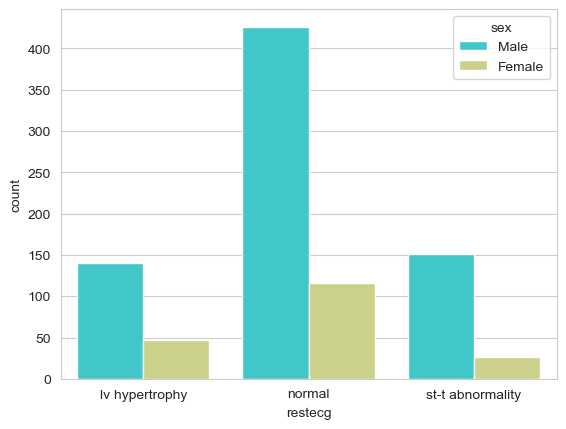

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='restecg',data=data,hue='sex',palette='rainbow')
plt.show()

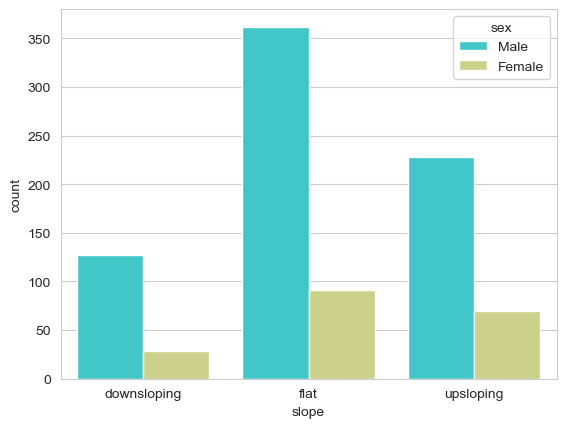

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='slope',data=data,hue='sex',palette='rainbow')
plt.show()

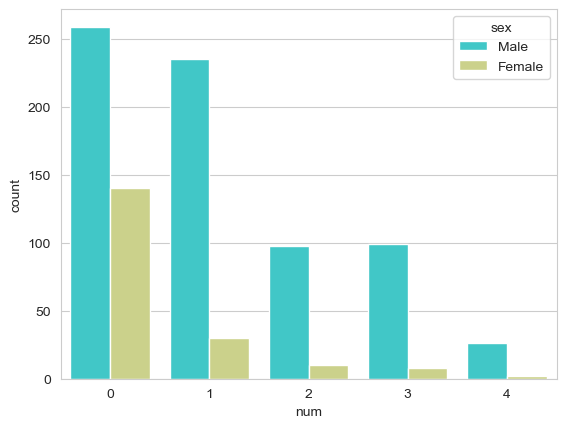

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='num',data=data,hue='sex',palette='rainbow')
plt.show()

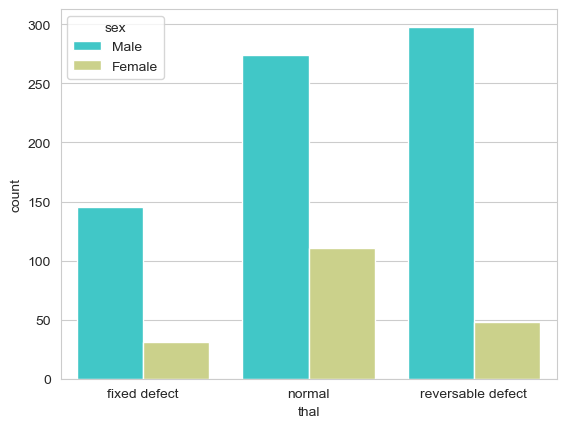

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='thal',data=data,hue='sex',palette='rainbow')
plt.show()

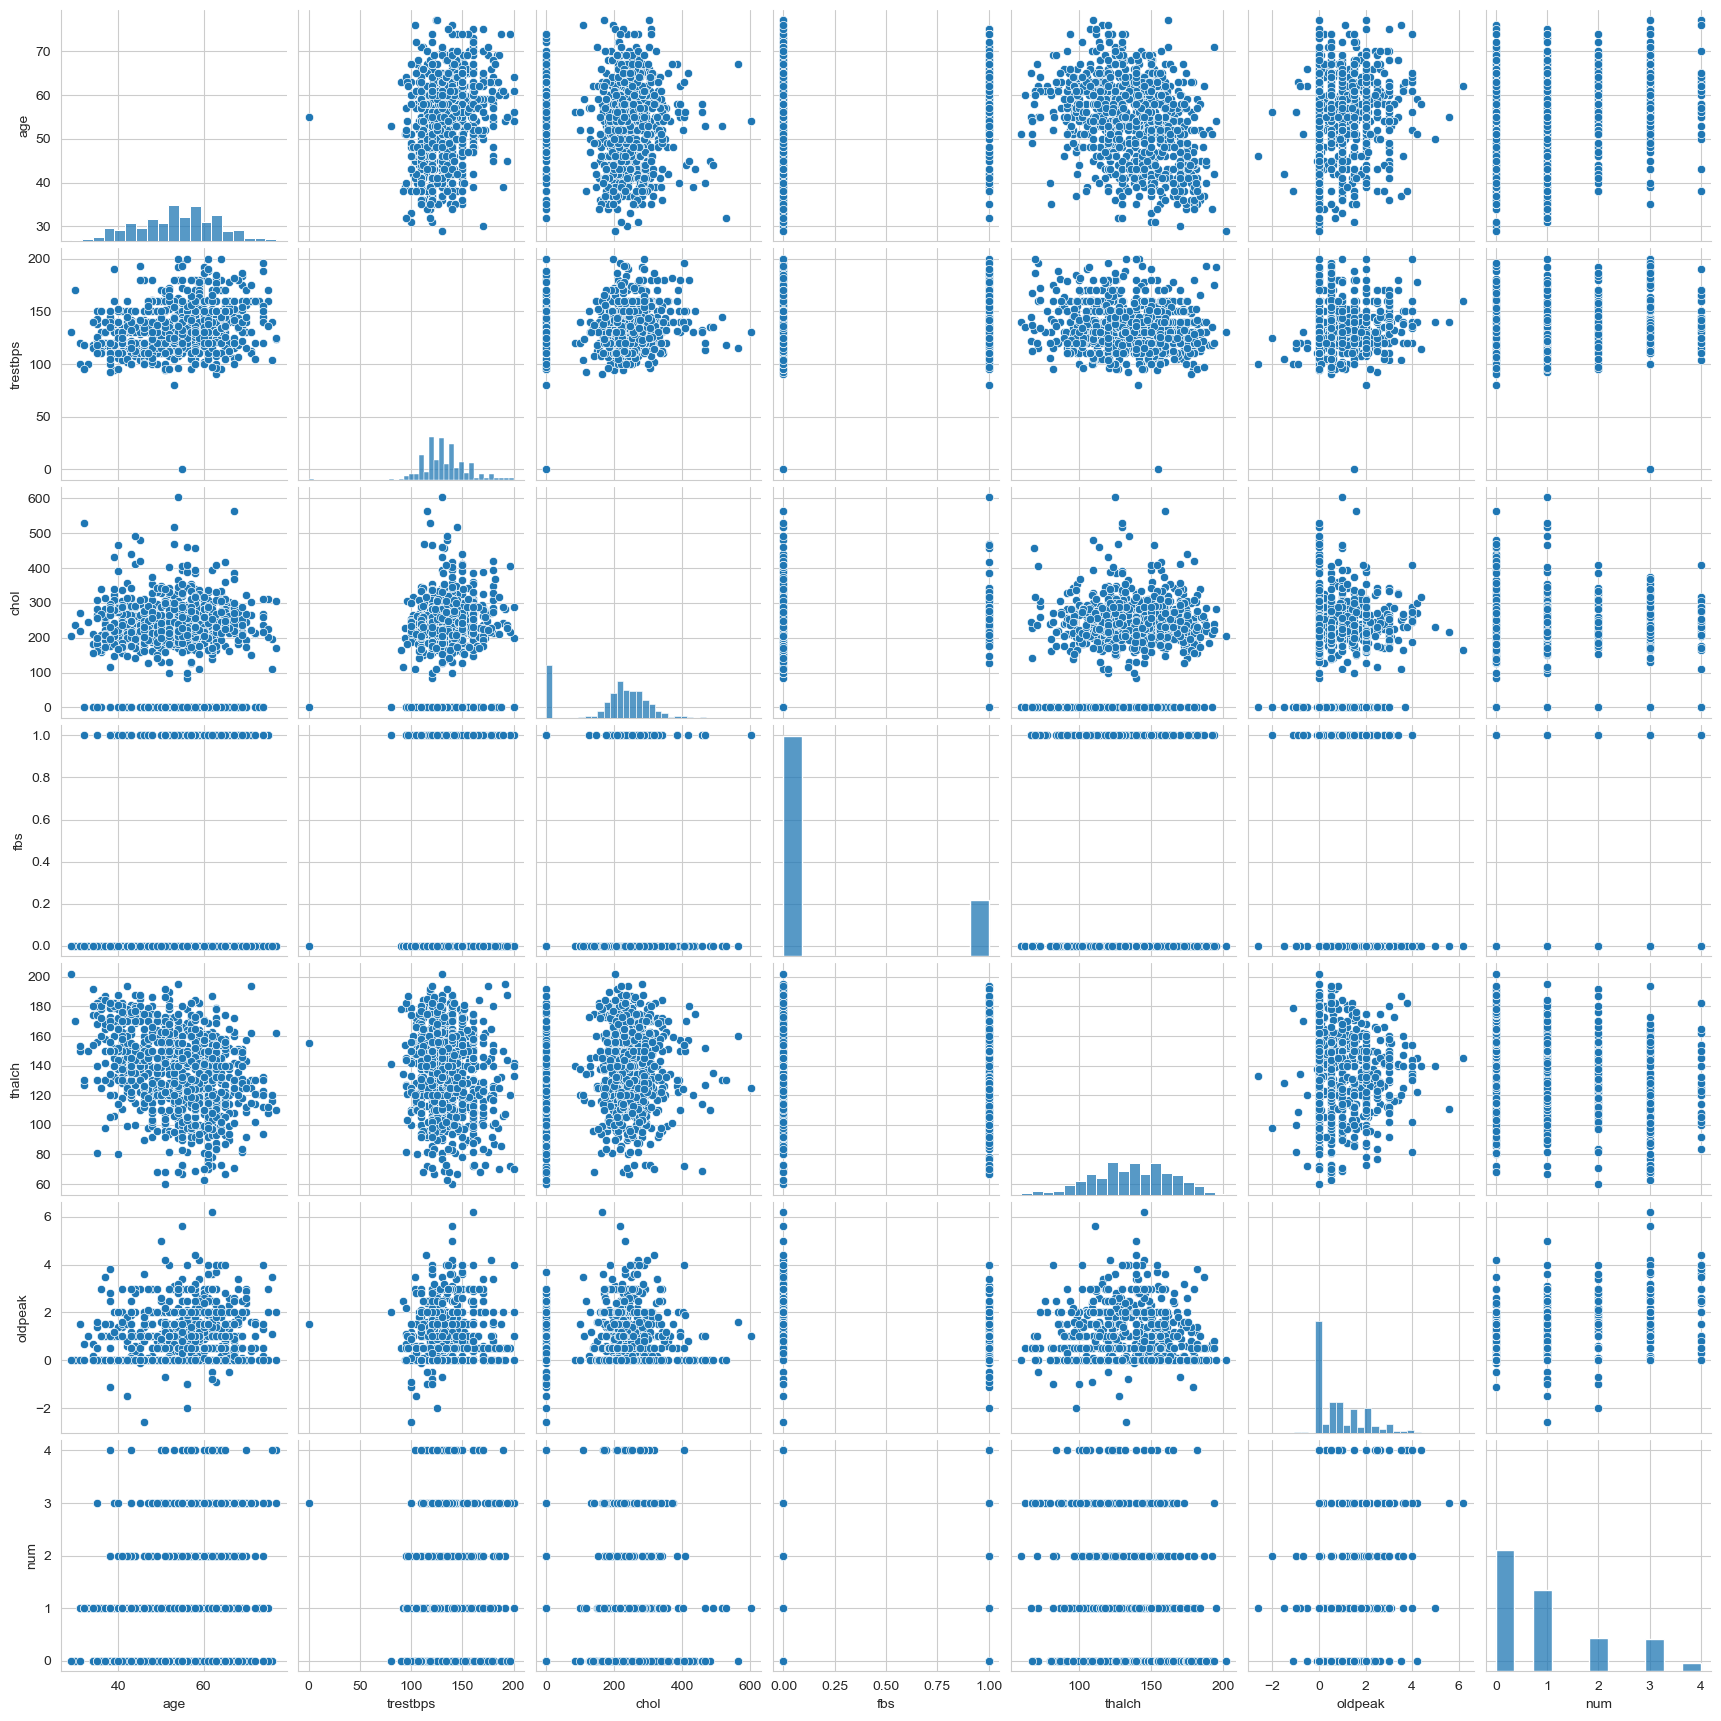

In [19]:
# To check the pairwise relation in dataset 
sns.pairplot(data)
plt.show()

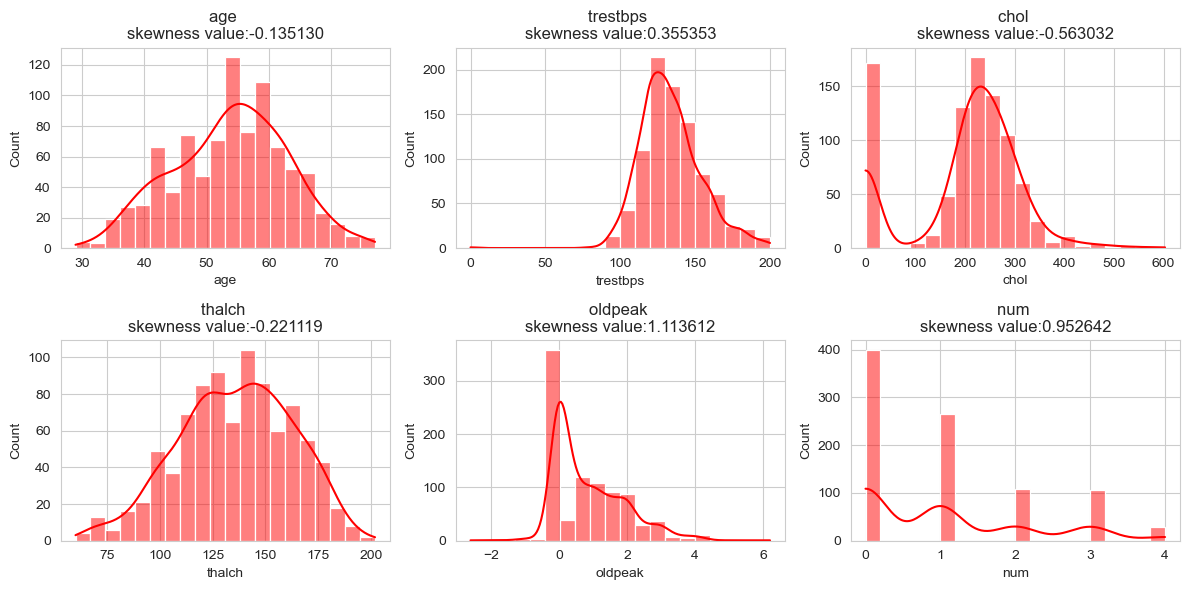

In [20]:
# To select all numerical columns
numerical_col=data.select_dtypes(include=np.number).columns
from scipy.stats import skew

# set the figure size
plt.figure(figsize=(12,6))
# loop through each numerical column and plot histogram
for i,column in enumerate(numerical_col,1):
    plt.subplot(2,3,i)
    skewed_value=skew(data[column].dropna())
    sns.histplot(data[column],kde=True,bins=20,color='r')
    plt.title(f'{column} \nskewness value:{skewed_value:2f}')
plt.tight_layout()
plt.show()

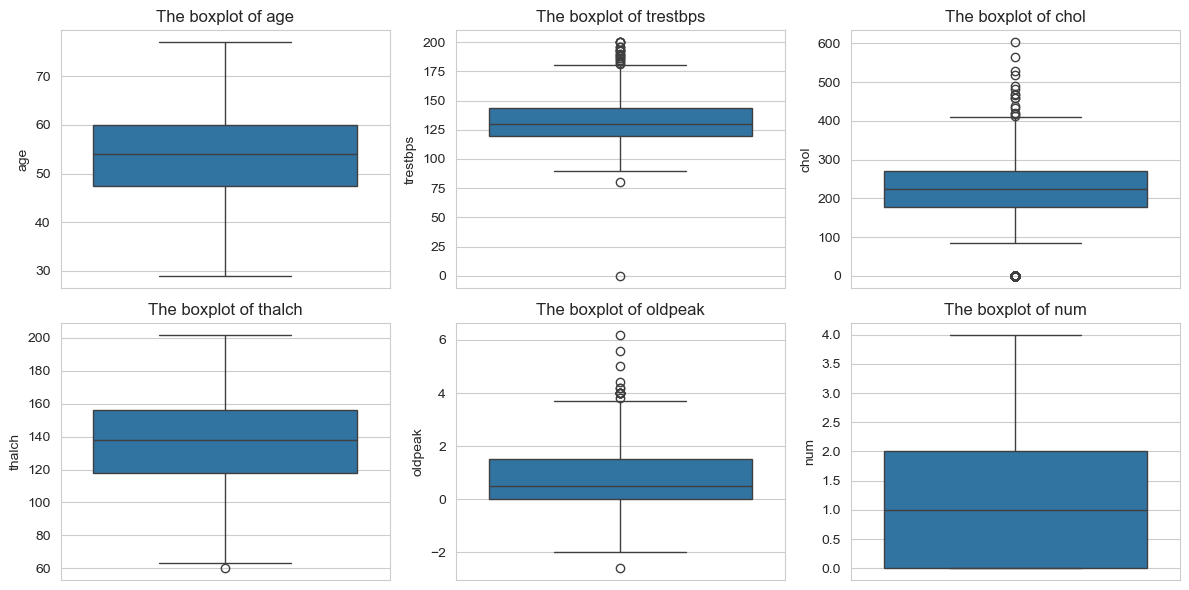

In [21]:
#To create a boxplot to identify the outliers
numeric_col=data.select_dtypes(include=['number']).columns
# set the figure size
plt.figure(figsize=(12,6))
#loop through each numerical column and plot boxplot
for i,column in enumerate(numeric_col,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=data[column])
    plt.title(f'The boxplot of {column}')
plt.tight_layout()
plt.show()


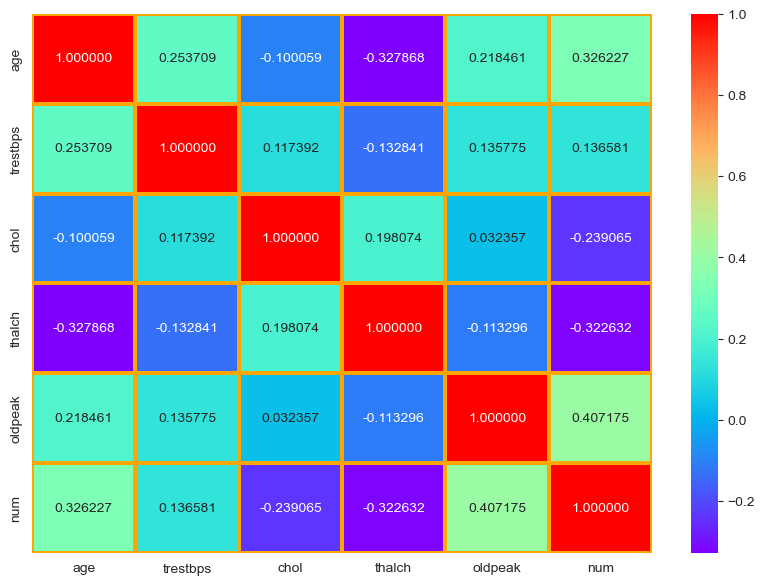

In [22]:
# corelation matrix
# select all numeric columns
numeric=data.iloc[:,[0,3,4,7,9,12]]
# set the figure size
plt.figure(figsize=(10,7))
corr=numeric.corr()
sns.heatmap(corr,annot=True,cbar=True,fmt='2f',linewidth=1.5,cmap='rainbow',linecolor='orange')
plt.show()

## <font color='orange'>Feature Engineering</font>

In [24]:
data_set=data.copy()
data_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [25]:
# To remove outliers
def remove_outliers_replace_with_median(data_set):
    for column in data_set.select_dtypes(include=np.number).columns:
        Q1=data_set[column].quantile(0.25)
        Q3=data_set[column].quantile(0.75)
        IQR=Q1-Q3
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q1+(1.5*IQR)
        median=data_set[column].median()
        data[column]=data[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)
        return data_set

clean_data=remove_outliers_replace_with_median(data_set)
clean_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [26]:
# Normalizing the numerical columns in the data_set
# select all numerical columns
numeric_col=['age','trestbps','chol','thalch','oldpeak','num']

#implement MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#Normalizing the data
clean_data[numeric_col]=scaler.fit_transform(clean_data[numeric_col])
clean_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,Male,typical angina,0.725,0.386401,True,lv hypertrophy,0.633803,False,0.556818,downsloping,fixed defect,0.0
1,0.250000,Male,atypical angina,0.675,0.336650,False,normal,0.507042,False,0.295455,flat,fixed defect,0.0
2,0.583333,Male,asymptomatic,0.700,0.318408,False,normal,0.619718,False,0.340909,flat,fixed defect,0.0
3,0.479167,Male,typical angina,0.590,0.308458,False,lv hypertrophy,0.915493,False,0.295455,flat,fixed defect,0.0
4,0.583333,Male,asymptomatic,0.550,0.333333,False,normal,0.464789,True,0.465909,flat,fixed defect,0.0


In [27]:
# LabelEncoding The data

# selecting all catagorical columns in data_set
catagorical_col=['sex','cp','restecg','slope','thal','fbs','exang']

#Initializing LabelEncoder
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

#implementing the LabelEncoder to catagorical columns
for col in catagorical_col:
    clean_data[col]=Le.fit_transform(clean_data[col].astype(str))
    
clean_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.725,0.386401,1,0,0.633803,1,0.556818,0,0,0.0
1,0.250000,1,1,0.675,0.336650,0,1,0.507042,1,0.295455,1,0,0.0
2,0.583333,1,0,0.700,0.318408,0,1,0.619718,1,0.340909,1,0,0.0
3,0.479167,1,3,0.590,0.308458,0,0,0.915493,1,0.295455,1,0,0.0
4,0.583333,1,0,0.550,0.333333,0,1,0.464789,3,0.465909,1,0,0.0


## <font color='orange'>Implementation of Decision classification</font>

In [29]:
# split the data for training and testing
x=clean_data.drop(columns=['sex'])
y=clean_data['sex']

In [30]:
# import train_test_split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(f'The x_train shape is:{x_train.shape}')
print(f'The x_test shape is:{x_test.shape}')
print(f'The y_train shape is:{y_train.shape}')
print(f'The y_test shape is:{y_test.shape}')

The x_train shape is:(725, 12)
The x_test shape is:(182, 12)
The y_train shape is:(725,)
The y_test shape is:(182,)


In [31]:
# import DecisionTreeClassifier from sklearn and fit the model
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
from sklearn.metrics import accuracy_score
import numpy as np
# To predict the model
y_train_pred=model_dt.predict(x_train)
y_test_pred=model_dt.predict(x_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print(f'The training accuracy is: {np.round(train_acc,3)}')
print(f'The testing accuracy is: {np.round(test_acc,3)}')

The training accuracy is: 1.0
The testing accuracy is: 0.725


## <font color='orange'>Model Evaluation and analysis</font>

In [33]:
from sklearn.metrics import f1_score,precision_score,recall_score,classification_report,confusion_matrix
print(f'The classification report :\n {classification_report(y_test,y_test_pred)}')
print(f'The f1_score of test dataset :{np.round(f1_score(y_test,y_test_pred),2)}')
print(f'The precision_score of test datset: {np.round(precision_score(y_test,y_test_pred),2)}')
print(f'The recall_score of test dataset : {np.round(recall_score(y_test,y_test_pred),2)}')

The classification report :
               precision    recall  f1-score   support

           0       0.42      0.39      0.40        44
           1       0.81      0.83      0.82       138

    accuracy                           0.73       182
   macro avg       0.62      0.61      0.61       182
weighted avg       0.72      0.73      0.72       182

The f1_score of test dataset :0.82
The precision_score of test datset: 0.81
The recall_score of test dataset : 0.83


In [34]:
model_dt.predict_proba(x)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
clean_data['predict_proba']=model_dt.predict_proba(x)[:,1]
clean_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,predict_proba
0,0.708333,1,3,0.725,0.386401,1,0,0.633803,1,0.556818,0,0,0.0,1.0
1,0.250000,1,1,0.675,0.336650,0,1,0.507042,1,0.295455,1,0,0.0,1.0
2,0.583333,1,0,0.700,0.318408,0,1,0.619718,1,0.340909,1,0,0.0,1.0
3,0.479167,1,3,0.590,0.308458,0,0,0.915493,1,0.295455,1,0,0.0,1.0
4,0.583333,1,0,0.550,0.333333,0,1,0.464789,3,0.465909,1,0,0.0,1.0


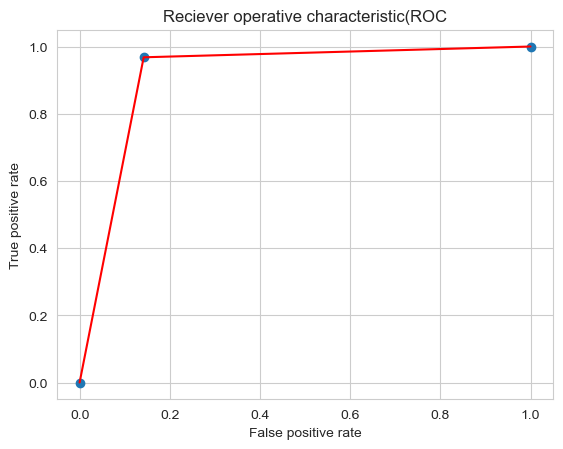

In [36]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy=roc_curve(y,clean_data['predict_proba'])
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='r')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operative characteristic(ROC')
plt.show()

In [37]:
score=roc_auc_score(y,clean_data['predict_proba'])
print(f'The area under curve is:{np.round(score,3)}')

The area under curve is:0.913


In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
print(f'The confusion matrix:\n {cm}')

The confusion matrix:
 [[ 17  27]
 [ 23 115]]


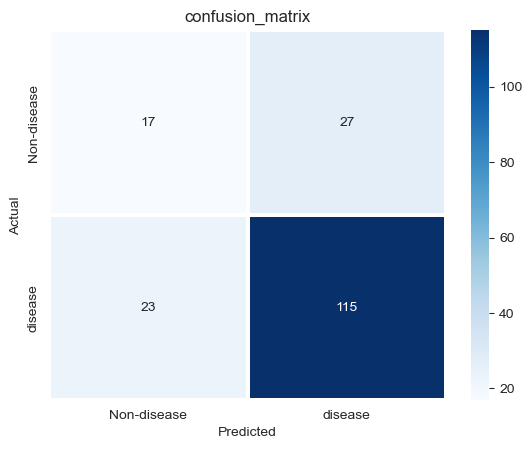

In [39]:
#heatmap visualizing of heatmap
sns.heatmap(cm,annot=True,fmt='d',linewidth=1.5,cmap='Blues',linecolor='white',xticklabels=['Non-disease','disease'],yticklabels=['Non-disease','disease'])
plt.title('confusion_matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## <font color='orange'>Hyperparameter Tuning</font>

In [40]:
# cross validation of dataset
training_acc=[]
testing_acc=[]
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model=DecisionTreeClassifier(max_depth=15)
    mode=model.fit(x_train,y_train) 
    model_train_pred=model.predict(x_train)
    model_test_pred=model.predict(x_test)
    training_acc.append(accuracy_score(y_train,model_train_pred))
    testing_acc.append(accuracy_score(y_test,model_test_pred))
print(f'The training accuracy :{np.round(np.mean(training_acc),2)}')
print(f'The testing accuracy:{np.round(np.mean(testing_acc),2)}')

The training accuracy :0.99
The testing accuracy:0.71


In [41]:
# depth of count of decision tree
print(f'The max depth :{model.tree_.max_depth}')
print(f'The max count :{model.tree_.node_count}')

The max depth :15
The max count :255


In [42]:
!pip install pydotplus

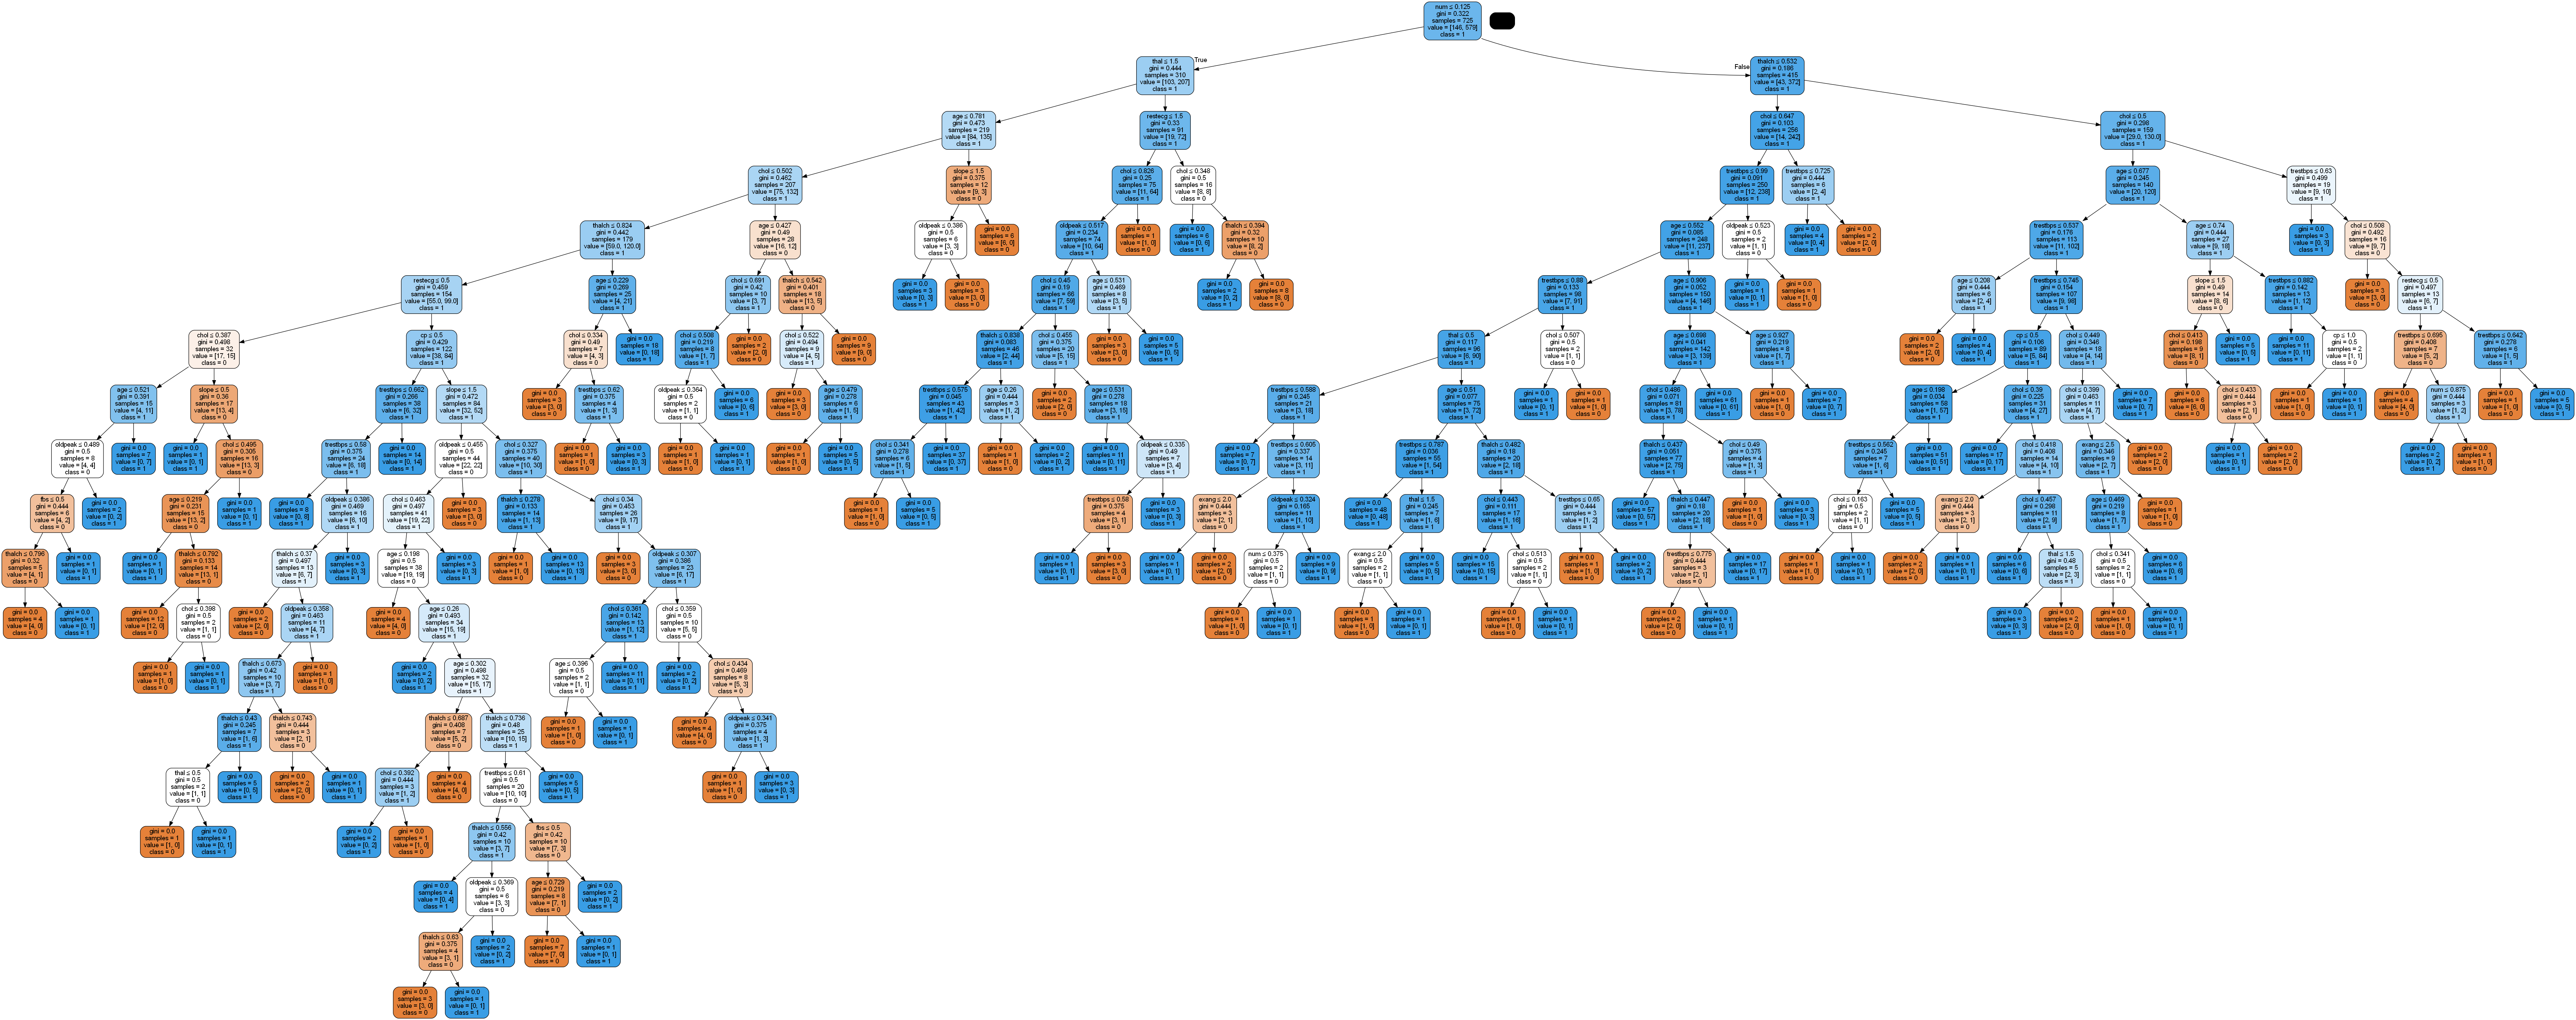

In [43]:
from  sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus # import pydotplus


# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=x.columns, class_names=['0', '1'])

# Convert to graph and display
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('sales_decision_tree.png')

# Display the decision tree image
Image(graph.create_png())

## <font color='orange'>Interview questions</font>

<p style="color:blue;font-size:20px;font-family:'Times New Roman';">1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?</p>

<p style="font-size= 20px;font-family='Times New Roman';">
Common decision tree hyperparameters like max_depth, min_samples_split, and min_samples_leaf control model complexity and prevent overfitting,
    impacting performance by influencing the tree's ability to generalize to unseen data.

max_depth

Low max_depth: Results in a simpler model that might underfit the data, failing to capture complex relationships.
    High max_depth: Leads to a more complex model that can overfit the training data, performing poorly on unseen data.

   
main_sample_split
   
   Low min_samples_split: Allows for more splits, potentially leading to a complex and overfitting model.
   High min_samples_split: Restricts splitting, leading to a simpler model that might underfit.

min_weight_fraction_leaf
   
   Low min_weight_fraction_leaf: Allows for more leaf nodes, potentially leading to a complex and overfitting model.
   High min_weight_fraction_leaf: Restricts the formation of leaf nodes, leading to a simpler model that might underfit.

criterion
   
   gini (Gini impurity): Focuses on minimizing the impurity of the split, which can lead to a more balanced tree.
   entropy (Information gain): Focuses on maximizing the information gain of the split, which can lead to a more informative tree.</p>

<p style="color:blue;font-size:20px;font-family:'Times New Roman';">2. What is the difference between the Label encoding and One-hot encoding?</p>

<p style="font-size:20px;font-family:'Times New Roman';">

Label Encoding and One-Hot Encoding are two different techniques
used to convert categorical data into numerical form for machine learning models.
   Label encoding converts categorical data into numerical labels (integers), while one-hot encoding creates binary columns (0 or 1) for each category,
   representing each category as a separate feature.


LABEL ENCODING
    Label encoding assigns a unique integer to each category in a categorical variable.
    Simple and quick to implement.
    Uses less memory compared to one-hot encoding.


OHE HOT ENCODING
   One-hot encoding creates a new binary column for each category of a categorical feature.
  Prevents the model from assuming any ordinal relationship between the categories.
  Widely applicable to many types of machine learning algorithm</p>